### Cie-Lab


In [7]:
import numpy as np
from utils import *
from skimage import util
from skimage.color import rgb2lab

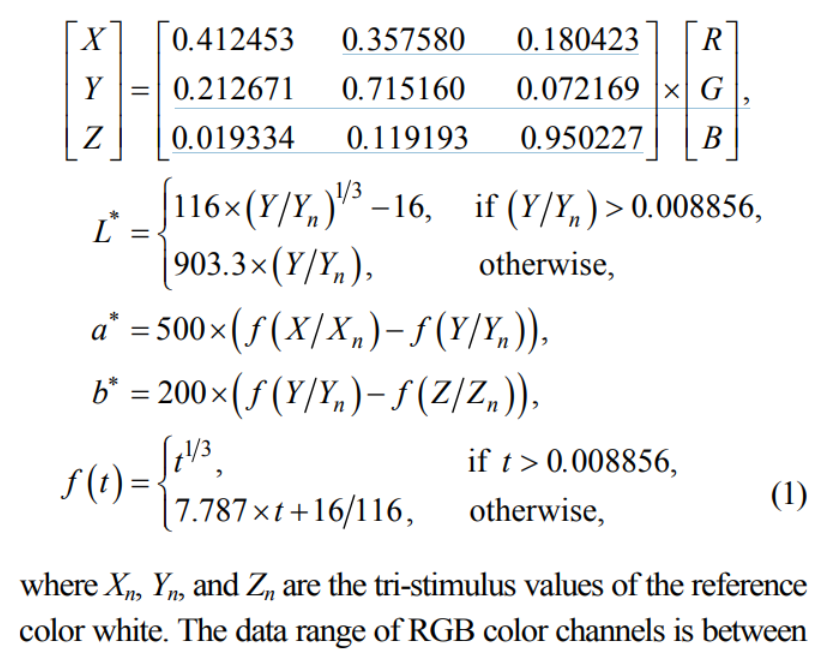

$
\begin{bmatrix}
X\\
Y\\
Z
\end{bmatrix} = 
\begin{bmatrix}
0.412453 & 0.357580 & 0.180423\\
0.212671 & 0.715160 & 0.072169\\
0.019334 & 0.119193 & 0.950227
\end{bmatrix}
\times
\begin{bmatrix}
R\\
G\\
B
\end{bmatrix}
$

$
L^* = 
\left\{ 
    \begin{array}{lcc} 
        116 \times (Y/Y_n)^{1/3}-16 & si & (Y/Y_n) > 0.008856,\\ \\
        7.787 \times t + 16/116 & si\ no
    \end{array} 
\right.
$

$
a^* = 500 \times (f(X/X_n) - f(Y/Y_n))
$

$
b^* = 200 \times (f(Y/Y_n) - f(Z/Z_n))
$

$
f(t) = 
\left\{ 
    \begin{array}{lcc} 
        t^{1/3} & si & t > 0.008856,\\ \\
        903.3 \times (Y/Y_n) & si\ no
    \end{array} 
\right.
$

Con $X_n,\ Y_n$ y $Z_n$...

In [8]:
def f_lab(t):
    res = 0
    if t > 0.008856:
        res = t ** (1 / 3)
    else:
        res = 7.787 * t + (16/116)
    return res


def rgb_a_lab(rgb):
    matrix_lab = np.array([
        [0.412453, 0.357580, 0.180423],
        [0.212671, 0.715160, 0.072169],
        [0.019334, 0.119193, 0.950227],
    ])
    #rgb=rgb*100
    xyz = np.matmul(matrix_lab, rgb)
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]

    # tristimulus D65 std second obs, Y normalizado a 100
    # https://en.wikipedia.org/wiki/Standard_illuminant
    xn = 95.047/100
    yn = 100/100
    zn = 108.883/100
    a = 500 * (f_lab(x / xn) - f_lab(y / yn))
    b = 200 * (f_lab(y / yn) - f_lab(z / zn))
    if y / yn > 0.00856:
        l=116 * ((y / yn) ** (1 / 3)) - 16
    else:
        l=903.3 * y / yn
    return (l, a, b)


def rgb_a_lab_img(imag):
    h,w,_=imag.shape
    imag=util.img_as_float(imag)
    img_lab=np.zeros((h,w,3),dtype=float)
    for i in range(h):
        for j in range(w):
            img_lab[i,j]=rgb_a_lab(imag[i,j])
    return img_lab


# o usar img_lab = rgb2lab(img)
# o cv2.COLOR_RGB2Lab
#https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html

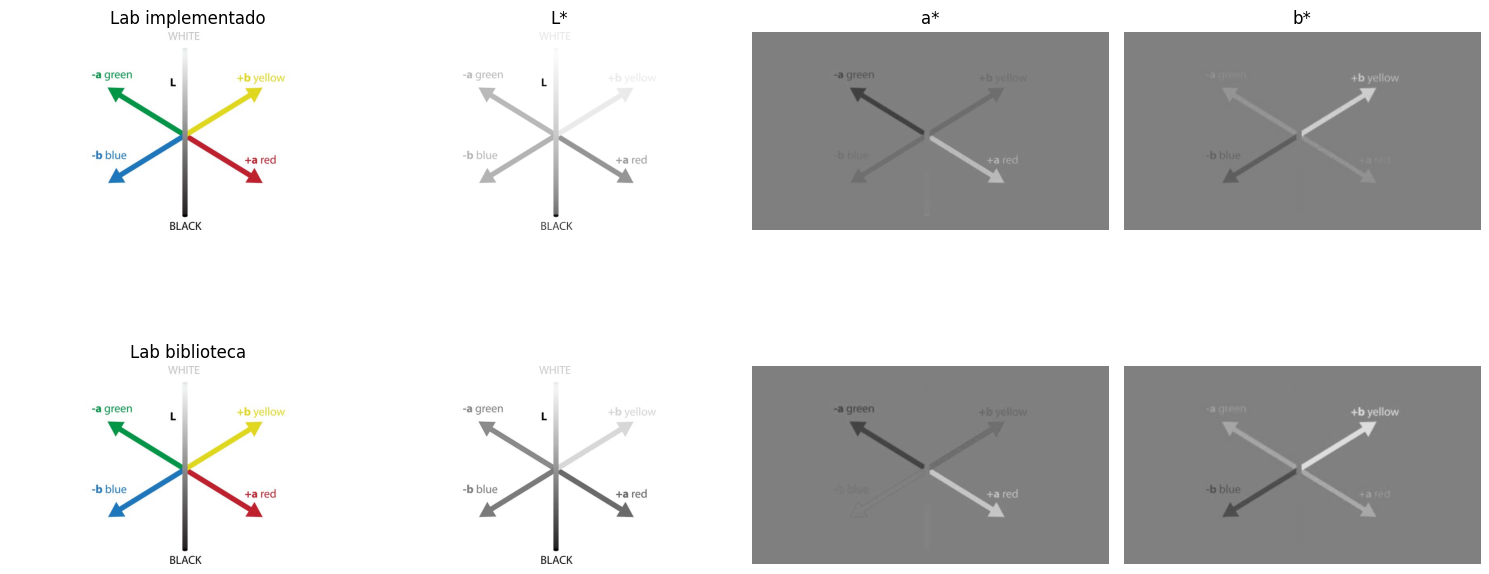

l:
0.0
0.0
100.0
100.0
a:
-58.72962842933932
-55.196798633672664
61.15086732074771
65.42948252290526
b:
-32.748504015687075
-48.8416610590535
82.74371807780199
85.3811420334816


In [9]:
def test_lab():
    img = load_image("./images/img_teoria/CIELAB.jpg")

    img_lab=rgb_a_lab_img(img)
    #img_lab_lib= cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    img_lab_lib= rgb2lab(img)

    ll = img_lab[:, :, 0]
    aa = img_lab[:, :, 1]
    bb = img_lab[:, :, 2]

    l_lib = img_lab_lib[:, :, 0]
    a_lib = img_lab_lib[:, :, 1]
    b_lib = img_lab_lib[:, :, 2]

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    ax = axes.ravel()

    ax[0].imshow(img)  # Imagen Compuesta
    ax[1].imshow(ll, cmap=plt.cm.gray,vmin=0,vmax=100)  # L*
    ax[2].imshow(aa, cmap=plt.cm.gray,vmin=-110,vmax=110)  # a*
    ax[3].imshow(bb, cmap=plt.cm.gray,vmin=-110,vmax=110)  # b*

    ax[4].imshow(img)  # Imagen Compuesta
    ax[5].imshow(l_lib, cmap=plt.cm.gray,vmin=0,vmax=100)  # L*
    ax[6].imshow(a_lib, cmap=plt.cm.gray,vmin=-110,vmax=110)  # a*
    ax[7].imshow(b_lib, cmap=plt.cm.gray,vmin=-110,vmax=110)  # b*


    for t in ax:
        t.axis('off')

    ax[0].set_title('Lab implementado')
    ax[1].set_title('L*')
    ax[2].set_title('a*')
    ax[3].set_title('b*')
    ax[4].set_title('Lab biblioteca')
    fig.tight_layout()
    plt.show()

    ####hay que arreglar rgb a lab..
    print('l:')
    print(np.min(ll))
    print(np.min(l_lib))
    print(np.max(ll))
    print(np.max(l_lib))
    print('a:')
    print(np.min(aa))
    print(np.min(a_lib))
    print(np.max(aa))
    print(np.max(a_lib))
    print('b:')
    print(np.min(bb))
    print(np.min(b_lib))
    print(np.max(bb))
    print(np.max(b_lib))

    #difl=ll-l_lib
    #plt.imshow(difl,cmap='gray')
test_lab()

[[[ 29 118 187]]]
[[[ 1.01904291e-14  0.00000000e+00 -1.11022302e-14]]]
[[[0. 0. 0.]]]


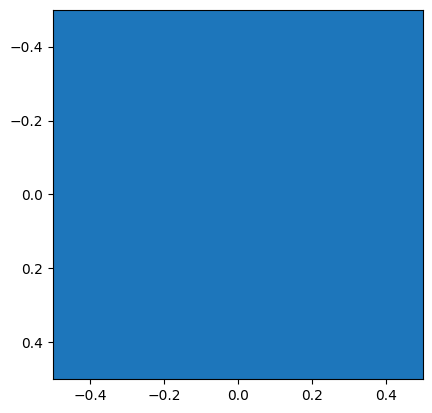

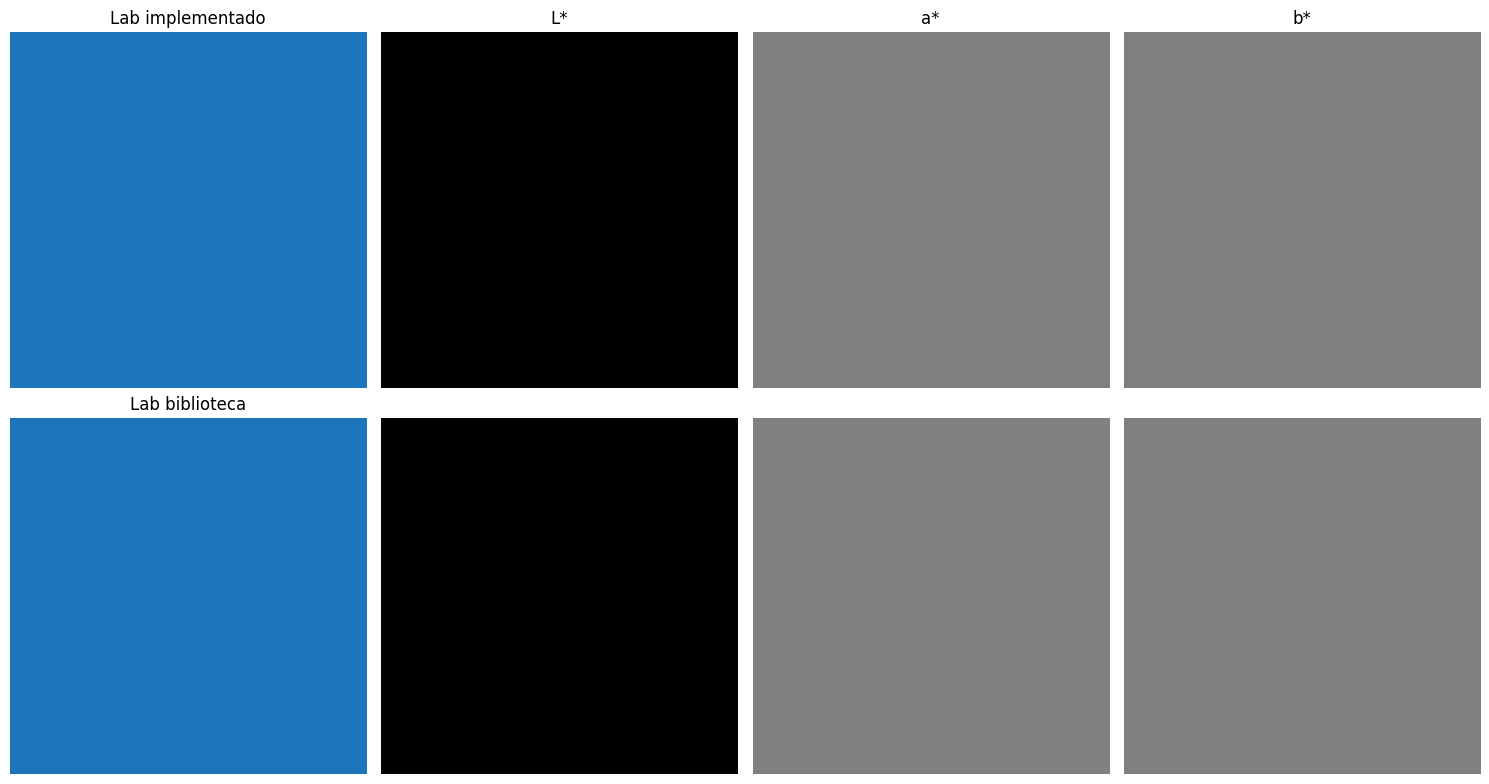

l:
1.0190429143813565e-14
0.0
1.0190429143813565e-14
0.0
a:
0.0
0.0
0.0
0.0
b:
-1.1102230246251565e-14
0.0
-1.1102230246251565e-14
0.0


In [10]:
def test_lab2():
    img=np.array([[[ 29, 118, 187]]])
    print(img)
    plt.imshow(img)
    #img = io.imread("./images/CIELAB.jpg")

    img_lab=rgb_a_lab_img(img)
    #img_lab_lib= cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    img_lab_lib= rgb2lab(img)

    print(img_lab)
    print(img_lab_lib)

    ll = img_lab[:, :, 0]
    aa = img_lab[:, :, 1]
    bb = img_lab[:, :, 2]

    l_lib = img_lab_lib[:, :, 0]
    a_lib = img_lab_lib[:, :, 1]
    b_lib = img_lab_lib[:, :, 2]


    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    ax = axes.ravel()

    ax[0].imshow(img)  # Imagen Compuesta
    ax[1].imshow(ll, cmap=plt.cm.gray,vmin=0,vmax=100)  # L*
    ax[2].imshow(aa, cmap=plt.cm.gray,vmin=-110,vmax=110)  # a*
    ax[3].imshow(bb, cmap=plt.cm.gray,vmin=-110,vmax=110)  # b*

    ax[4].imshow(img)  # Imagen Compuesta
    ax[5].imshow(l_lib, cmap=plt.cm.gray,vmin=0,vmax=100)  # L*
    ax[6].imshow(a_lib, cmap=plt.cm.gray,vmin=-110,vmax=110)  # a*
    ax[7].imshow(b_lib, cmap=plt.cm.gray,vmin=-110,vmax=110)  # b*


    for t in ax:
        t.axis('off')

    ax[0].set_title('Lab implementado')
    ax[1].set_title('L*')
    ax[2].set_title('a*')
    ax[3].set_title('b*')
    ax[4].set_title('Lab biblioteca')
    fig.tight_layout()
    plt.show()

    ####hay que arreglar rgb a lab..
    print('l:')
    print(np.min(ll))
    print(np.min(l_lib))
    print(np.max(ll))
    print(np.max(l_lib))
    print('a:')
    print(np.min(aa))
    print(np.min(a_lib))
    print(np.max(aa))
    print(np.max(a_lib))
    print('b:')
    print(np.min(bb))
    print(np.min(b_lib))
    print(np.max(bb))
    print(np.max(b_lib))

test_lab2()

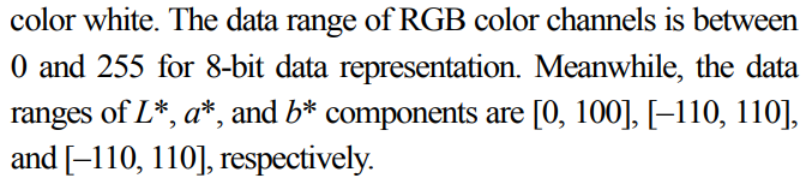